Matteo Tortora, PhD Student, m.tortora@unicampus.it

## Overview

In this tutorial, we will cover:
* Introduction to edge detection;
* Sharpening filters;
* Canny edge detection;
* Hough Transform;
* Now it's your turn.

## Introduction to edge detection

Edges are significant local changes in the image and
are important features for analyzing images.
Edges typically occur on the boundary between two
different regions in an image.

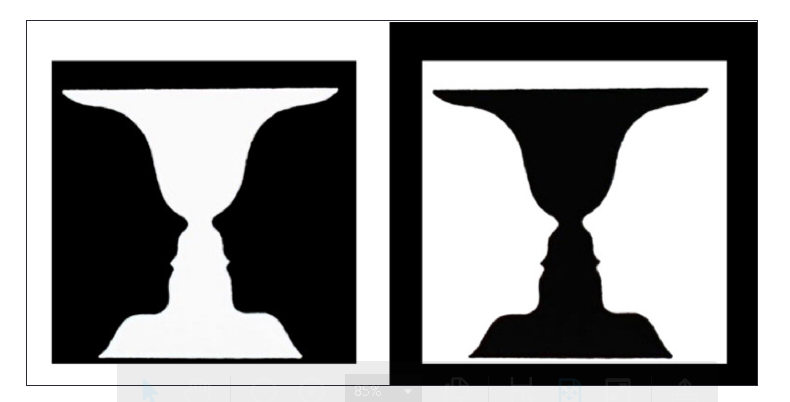

The goal of edge detection is to identify sudden
changes (discontinuities) in an image. The edges help us extract information, recognize objects, and recover geometry and viewpoint.

An optimal edge detector must have certain qualities:
1. Good detection
2. Good localization
3. Silent response

## Sharpening filters

Sharpening filters are derivative filters whose goal is to highlight or emphasise details in an image.

Hence, they perform the opposite operation to blurring (smoothing filters), enhancing fine details by increasing local variations in the presence of edges.

So unlike smoothing filters, which are low-pass filters, they are high-pass filters.

**Sobel Filter**

Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise:



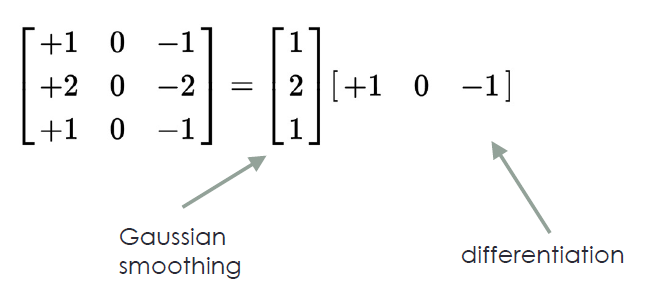

OpenCV implements the following method to perform the Sobel operator:

`cv2.Sobel(	src, dx, dy)`

where:

* *src*: input image.
* *ddepth*:	output image depth
* *dx*: 	order of the derivative x.
* *dy*: 	order of the derivative y.
* *ksize*: 	size of the extended Sobel kernel; it must be 1, 3, 5, or 7.

(-0.5, 899.5, 592.5, -0.5)

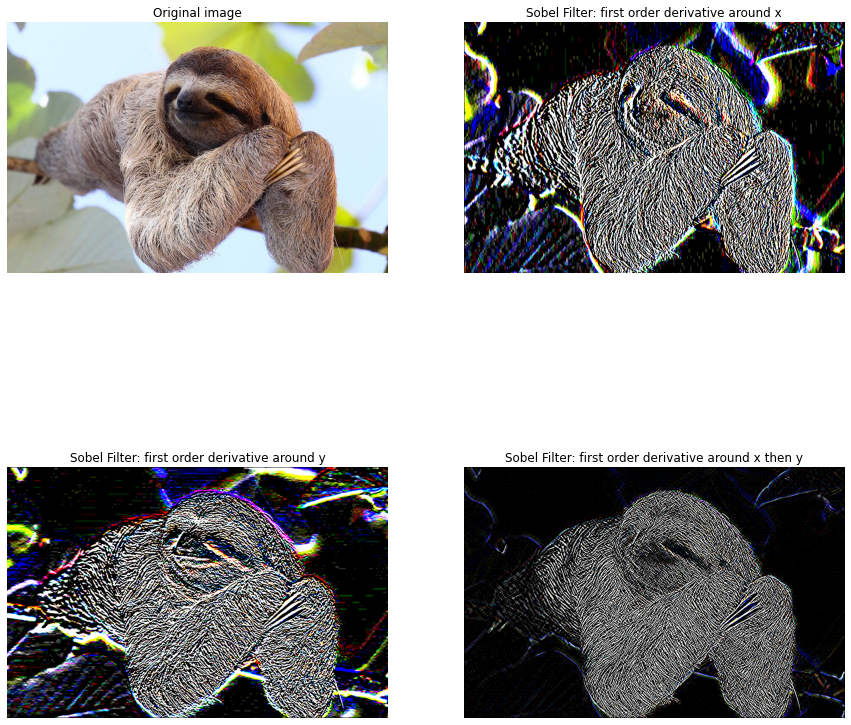

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('bradipo.png', 1) # Read image in BGR mode

dx = cv2.Sobel(img, cv2.CV_8UC1, 1,0,ksize=5) # Apply Sobel Filter: first order derivative around x
dy = cv2.Sobel(img, cv2.CV_8UC1, 0,1,ksize=5) # Apply Sobel Filter: first order derivative around y
dxy = cv2.Sobel(img, cv2.CV_8UC1, 1,1,ksize=5) # Apply Sobel Filter: first order derivative around x then y


# Plot results

# Plot the results
f = plt.figure(figsize=(15,15))

f.add_subplot(2, 2, 1).set_title('Original image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 2).set_title('Sobel Filter: first order derivative around x')
plt.imshow(cv2.cvtColor(dx, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 3).set_title('Sobel Filter: first order derivative around y')
plt.imshow(cv2.cvtColor(dy, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(2, 2, 4).set_title('Sobel Filter: first order derivative around x then y')
plt.imshow(cv2.cvtColor(dxy, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Canny edge detection

Canny Edge Detection is a popular edge detection algorithm. It is a multi-stage algorithm which performs the following 4 steps:

1.   **Noise Reduction**: First step is to remove the noise in the image with a 5x5 Gaussian smoothing filter.
2.   **Finding Intensity Gradient of the Image**: Then the smoothened image is filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction and vertical direction. Then, we can find edge gradient and direction for each pixel as follows:

$Edge\_Gradient (G) = \sqrt{G_x^2+G_y^2}$

$Angle (\theta) = \tan^{-1}(\frac{G_y}{G_x})$

3.   **Non-maximum Suppression**: To make sure the edges are specific, we suppress any pixels that have a non-maximum gradient.
4.   **Hysteresis Thresholding**: All remaining pixels are subjected to hysteresis thresholding. This part uses two values, for the high and low thresholds:
* Every pixel with a value above the high threshold
is marked as a strong edge
* Every pixel below the low threshold is set to 0
* Every pixel between the two thresholds is marked
as a weak edge then:



All these steps are encapsulated in the following OpenCV function: 

`cv2.Canny(src, threshold1, threshold2, apertureSize = 3, L2gradient = False)`

where:
* *src*: 8-bit input image.
* *threshold1*: first threshold for the hysteresis procedure.
* *threshold2*: second threshold for the hysteresis procedure.
* *apertureSize*: aperture size for the Sobel operator
* *L2gradient*: specifies the equation for finding gradient magnitude. If it is *True*, it uses the equation mentioned above which is more accurate. Otherwise it uses this function: 

$Edge\_Gradient(G)=|Gx|+|Gy|$

(-0.5, 659.5, 367.5, -0.5)

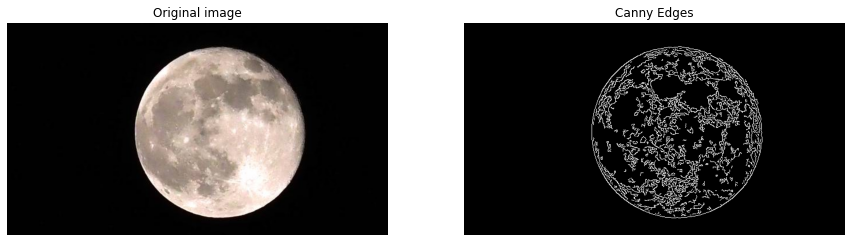

In [ ]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('moon.png', 1) # Read image as RGB
img_gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert it to grayscale

edges = cv2.Canny(img, 50, 100) # Apply Canny edge detection function

# Plot the results
f = plt.figure(figsize=(15,15))

f.add_subplot(1, 2, 1).set_title('Original image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(1, 2, 2).set_title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

## Hough Transform – original (lines)

The original Hough Transform is a popular technique to detect lines. It can detect the shape even if it is broken or distorted a little bit. We will see how it works for a line.

A line can be represented as:

* $y=mx+c$ 
* $\rho=xcos(\theta)+ysin(\theta)$ 

where:
* $\rho$: is the perpendicular distance from origin to the line
* $\theta$: is the angle formed by this perpendicular line and horizontal axis measured in counter-clockwise.

Hence, a line can be represented as a point in parametric space:

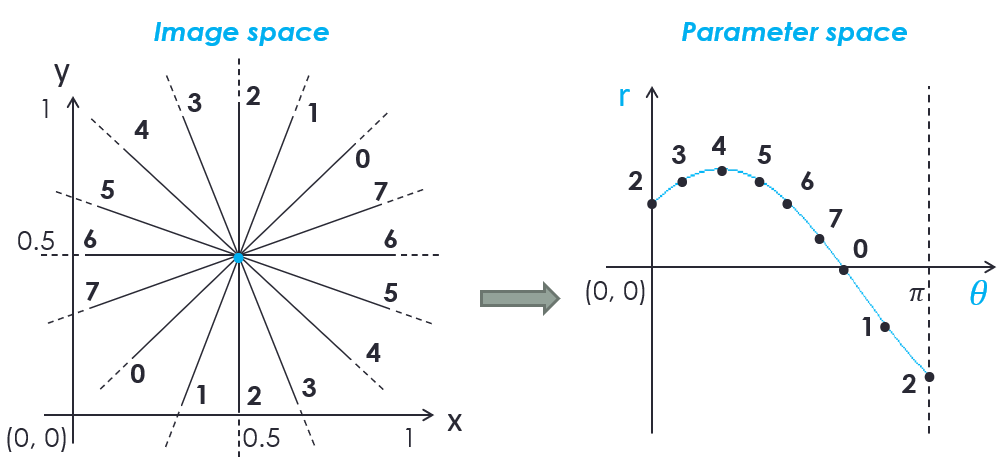

Then for each pixel in the image to which the Canny operator has been applied (so only the contour pixels survive) we calculate the concurrent lines. 
So for each point we get a sine wave. 
In the following we have only two points and therefore only two curves in the parameter space.

Finally, we can compute as follows the Hough space by counting the number of occurrences of each lines.

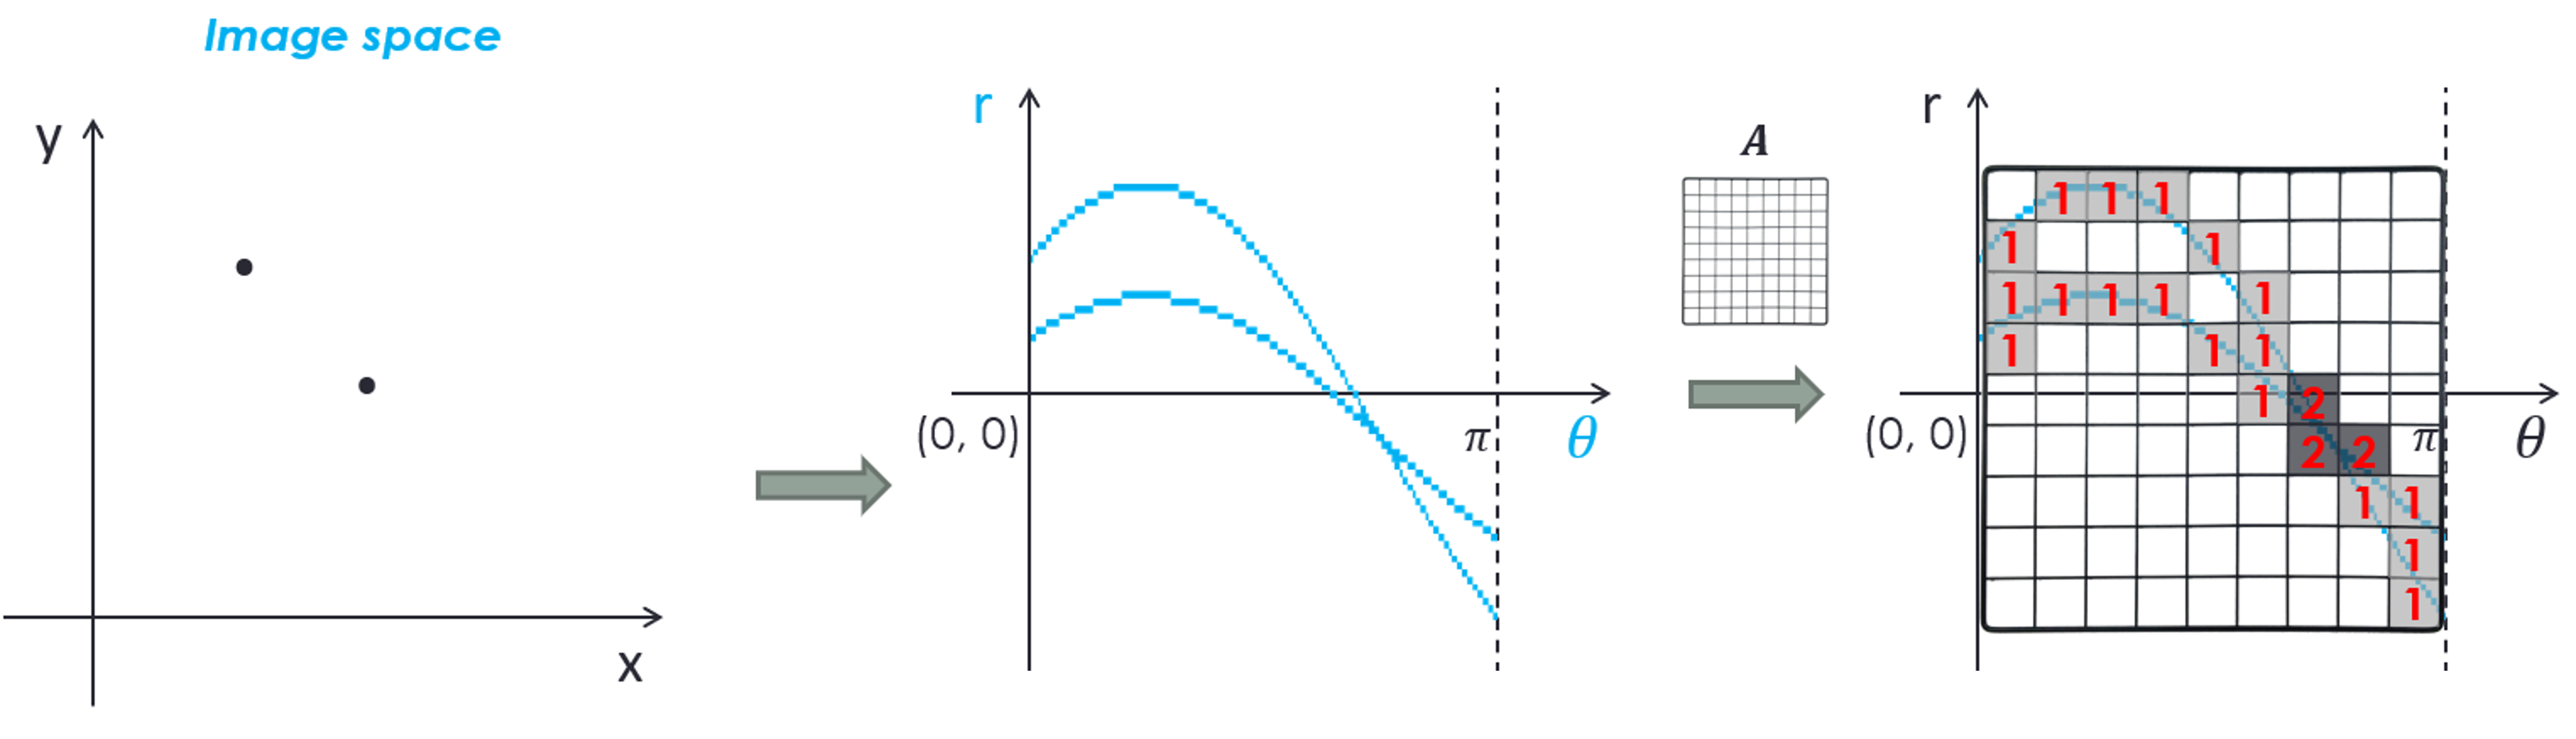

OpenCV implements the following method to detect lines:

`cv2.HoughLines (src, rho, theta, threshold)`

where:

* *src*: 8-bit, single-channel binary source image.
* *rho*: distance resolution of the accumulator in pixels.
* *theta*: angle resolution of the accumulator in radians.
*  *threshold*: it is the accumulator threshold parameter, which means minimum vote it should get for it to be considered as a line. Remember, number of votes depend upon number of points on the line. So it represents the minimum length of line that should be detected.

[Here](https://docs.opencv.org/4.5.3/d3/de6/tutorial_js_houghlines.html) you can find more information.

(-0.5, 676.5, 399.5, -0.5)

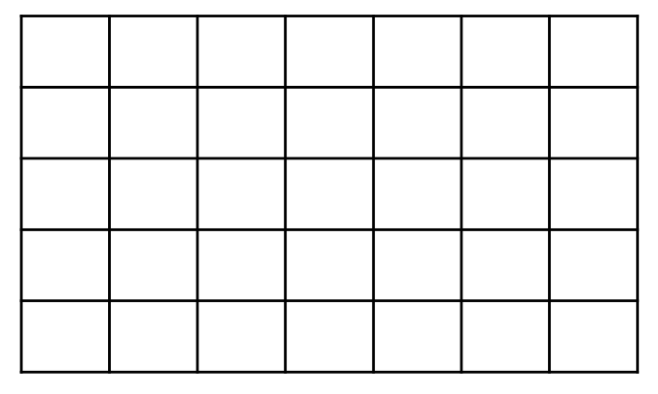

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread(r'griglia.png', 1) # Upload image in a BGR mod

f = plt.figure(figsize=(15,7))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 676.5, 399.5, -0.5)

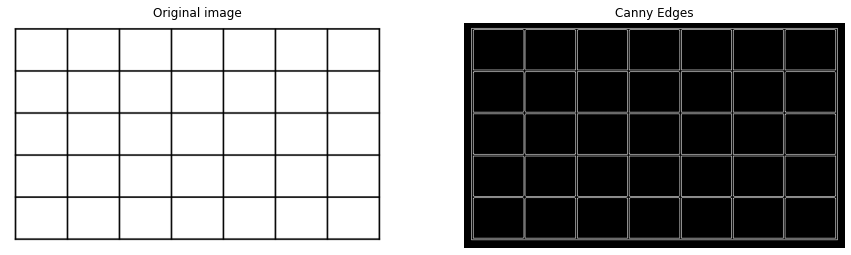

In [ ]:
# Plot the results
f = plt.figure(figsize=(15,7))

edges = cv2.Canny(img, 300, 500) # Apply Canny edge detection

f.add_subplot(1, 2, 1).set_title('Original image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

f.add_subplot(1, 2, 2).set_title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

(-0.5, 676.5, 399.5, -0.5)

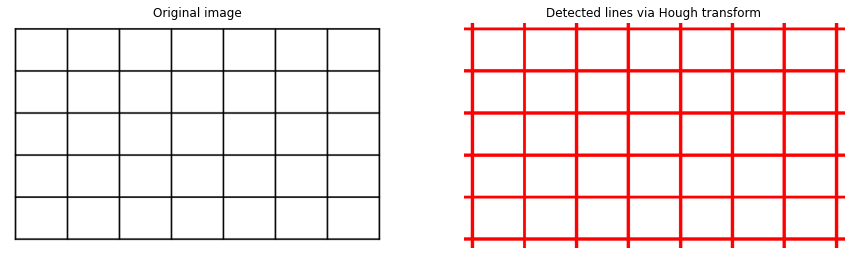

In [ ]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 200) # Apply Hough transform on the Canny image

f = plt.figure(figsize=(15,7))

f.add_subplot(1, 2, 1).set_title('Original image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Draw the detected lines
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)

    # from polar to Cartesian coordinates
    x0 = a*rho
    y0 = b*rho

    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))


    # draw line
    cv2.line(img, (x1,y1), (x2,y2), (0, 0, 255), 2)

f.add_subplot(1, 2, 2).set_title('Detected lines via Hough transform')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Hough Transform – extended (e.g. circles)



The Hough transform wasn't limited to lines detection, but the aim of its extension is to allow a user to detect a generic shape.

The only limitation is that the target shape needs to be represented using a mathematical formula with parameters.

OpenCV implements the following method for detecting circles:

`cv.HoughCircles(src, method, dp, minDist, param_1, param_2, min_radius, max_radius)`

where:
* *src*: grayscale input image.
* *method*: detection method.
* *dp*: the inverse ratio of resolution
* *minDist*: minimum distance between detected centers.
* *param_1*: Upper threshold for the internal Canny edge detector.
* *param_2*: Threshold for center detection.
* *min_radius*: Minimum radius to be detected. If unknown, put zero as default.
* *max_radius*: Maximum radius to be detected. If unknown, put zero as default.

This function has inbuilt canny detection, therefore it is not required to detect edges explicitly in it.

[Here](https://docs.opencv.org/4.5.3/d4/d70/tutorial_hough_circle.html) you can find more information.

(-0.5, 873.5, 374.5, -0.5)

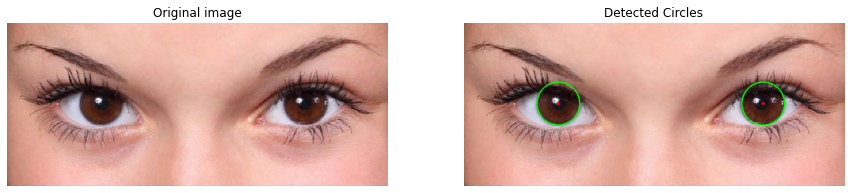

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread('occhi.png', 1) # Read image as RGB

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert it to gray-scale

img_blur = cv2.medianBlur(gray, 5) # Apply a Median blur to reduce noise and avoid false circle detection

f = plt.figure(figsize=(15,15))

f.add_subplot(1, 2, 1).set_title('Original image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Proceed to apply Hough Circle Transform
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/4, param1=200, param2=10, minRadius=45, maxRadius=50)
# change minDist value to detect circles with different distances to each other
# change the last two parameters (min_radius & max_radius) to detect larger circles

# Draw the detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

f.add_subplot(1, 2, 2).set_title('Detected Circles')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

## Now it's your turn

The goal is to plot the Hough space and to rotate via the Hough transform the following image.

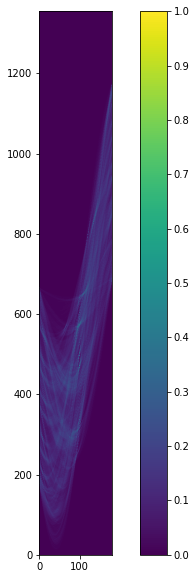

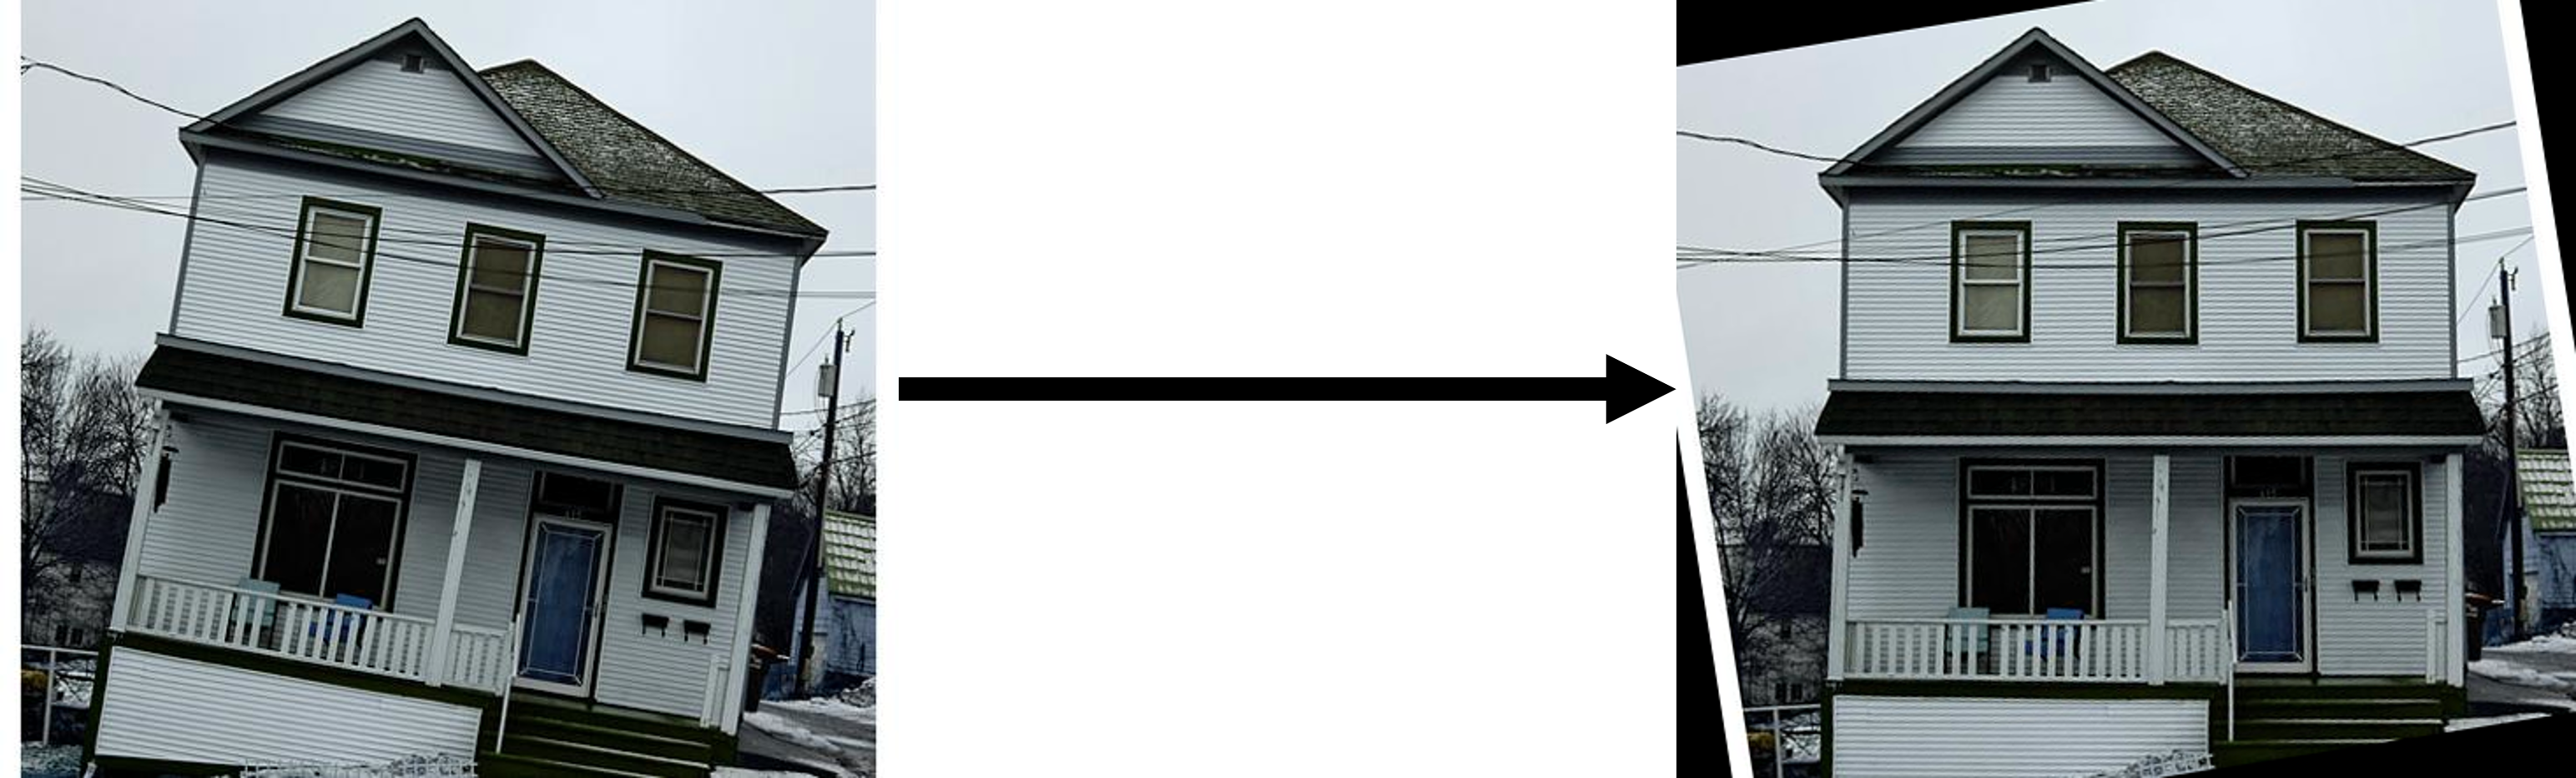